In [11]:
import numpy as np
import pandas as pd
from plotnine import ggplot 

%matplotlib inline
survs_df = pd.read_csv('surveys.csv').dropna()

In [13]:
survs_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
genus               object
species             object
taxa                object
plot_type           object
dtype: object

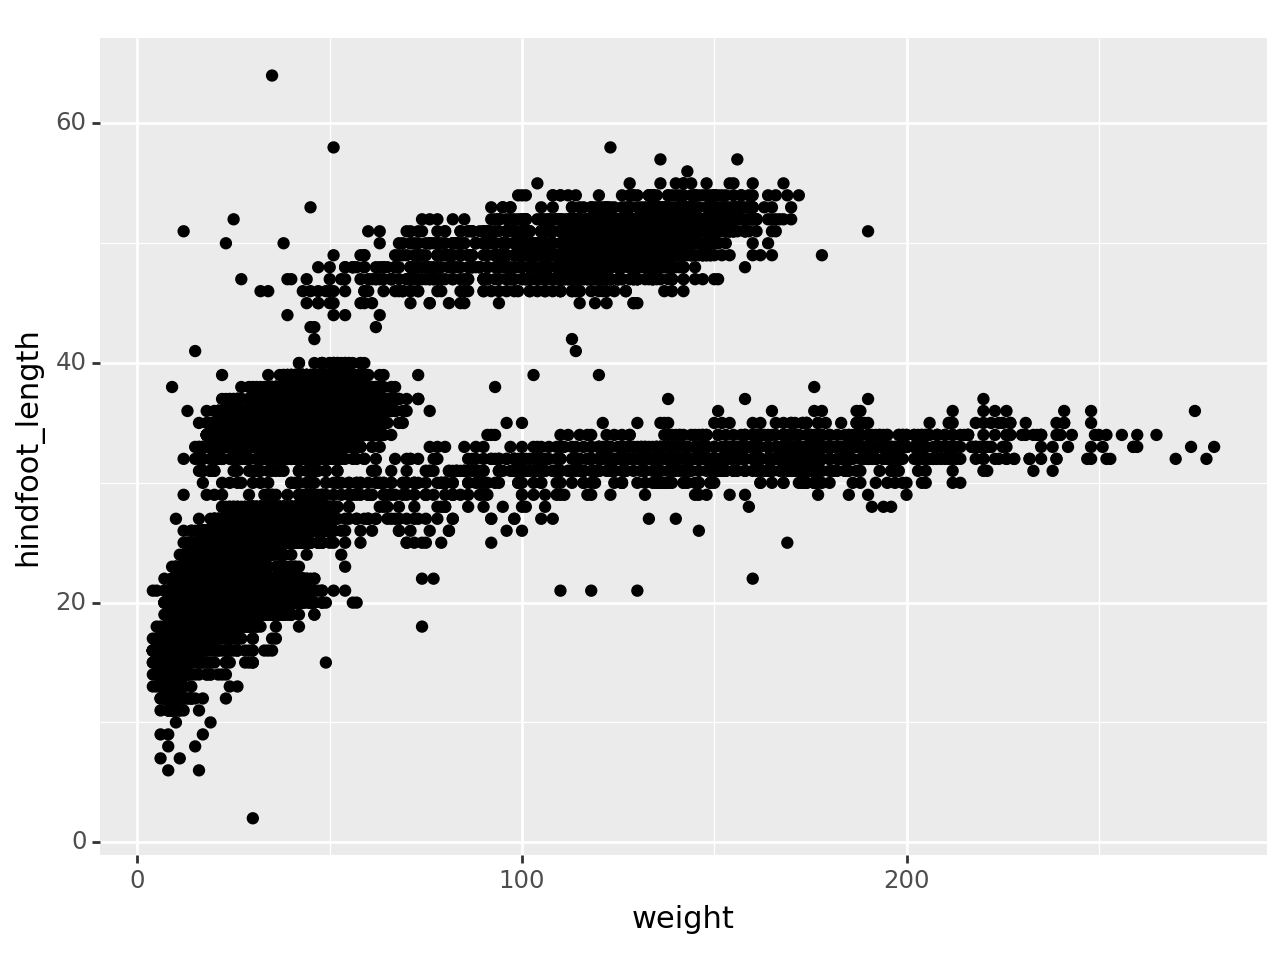

<Figure Size: (640 x 480)>

In [14]:
ggplot(survs_df) + aes(x='weight', y='hindfoot_length') + geom_point()

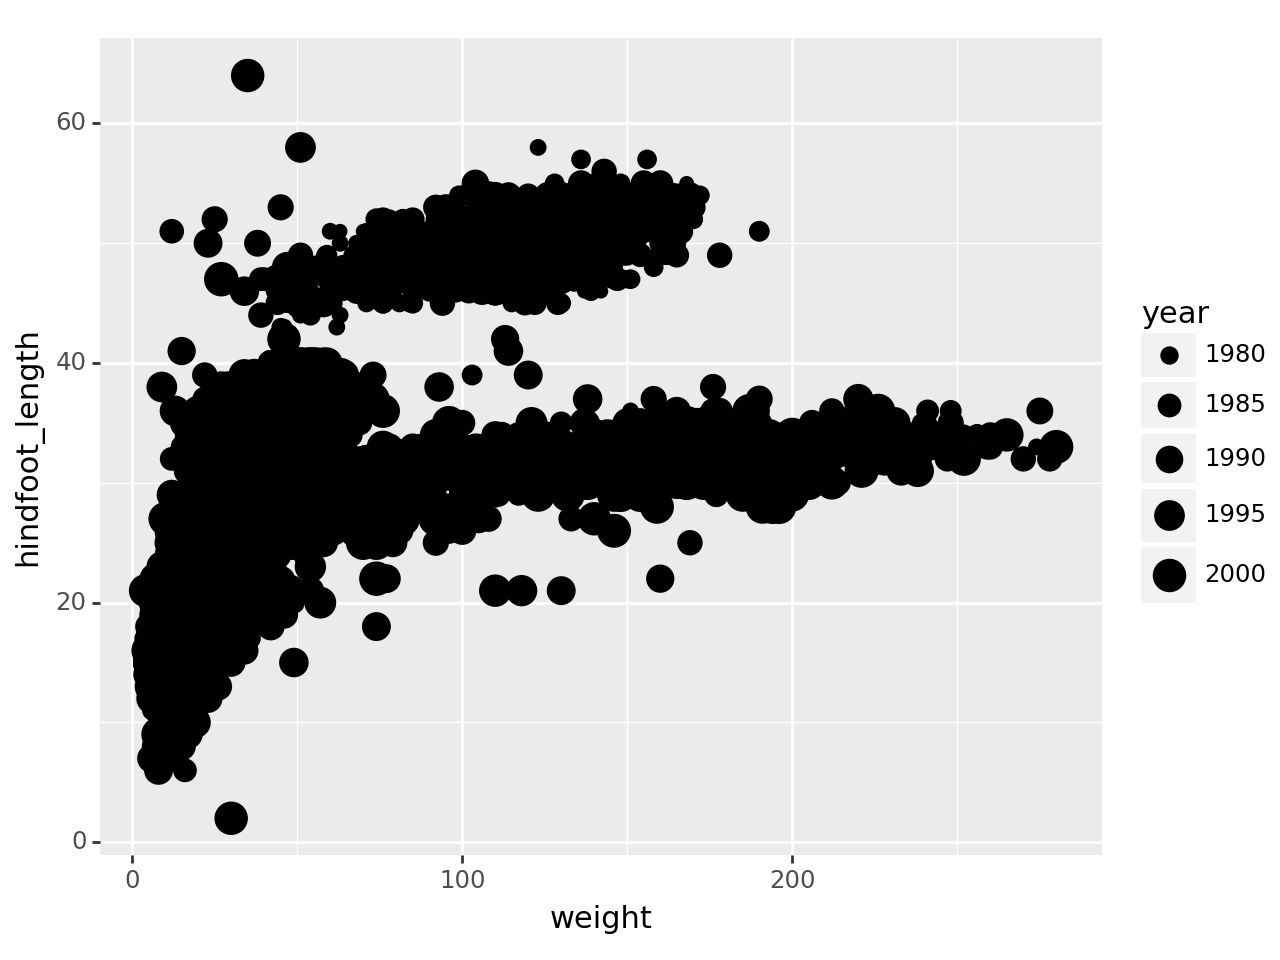

<Figure Size: (640 x 480)>

In [16]:
ggplot(survs_df) +  aes(x='weight', y='hindfoot_length',size = 'year') + geom_point()

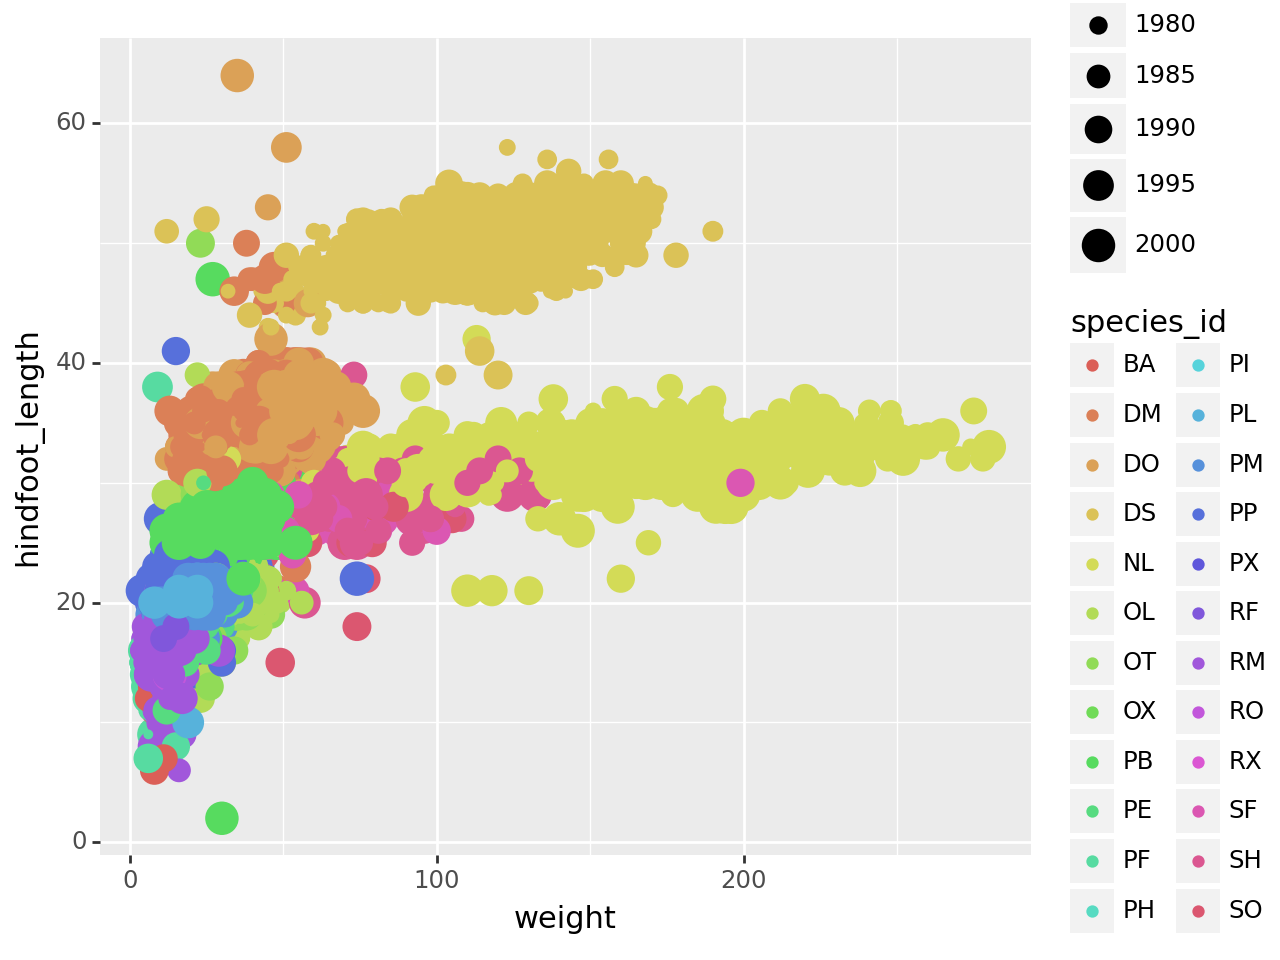

<Figure Size: (640 x 480)>

In [17]:
ggplot(survs_df) + aes(x='weight', y='hindfoot_length', 
    size = 'year', color = 'species_id') + geom_point()

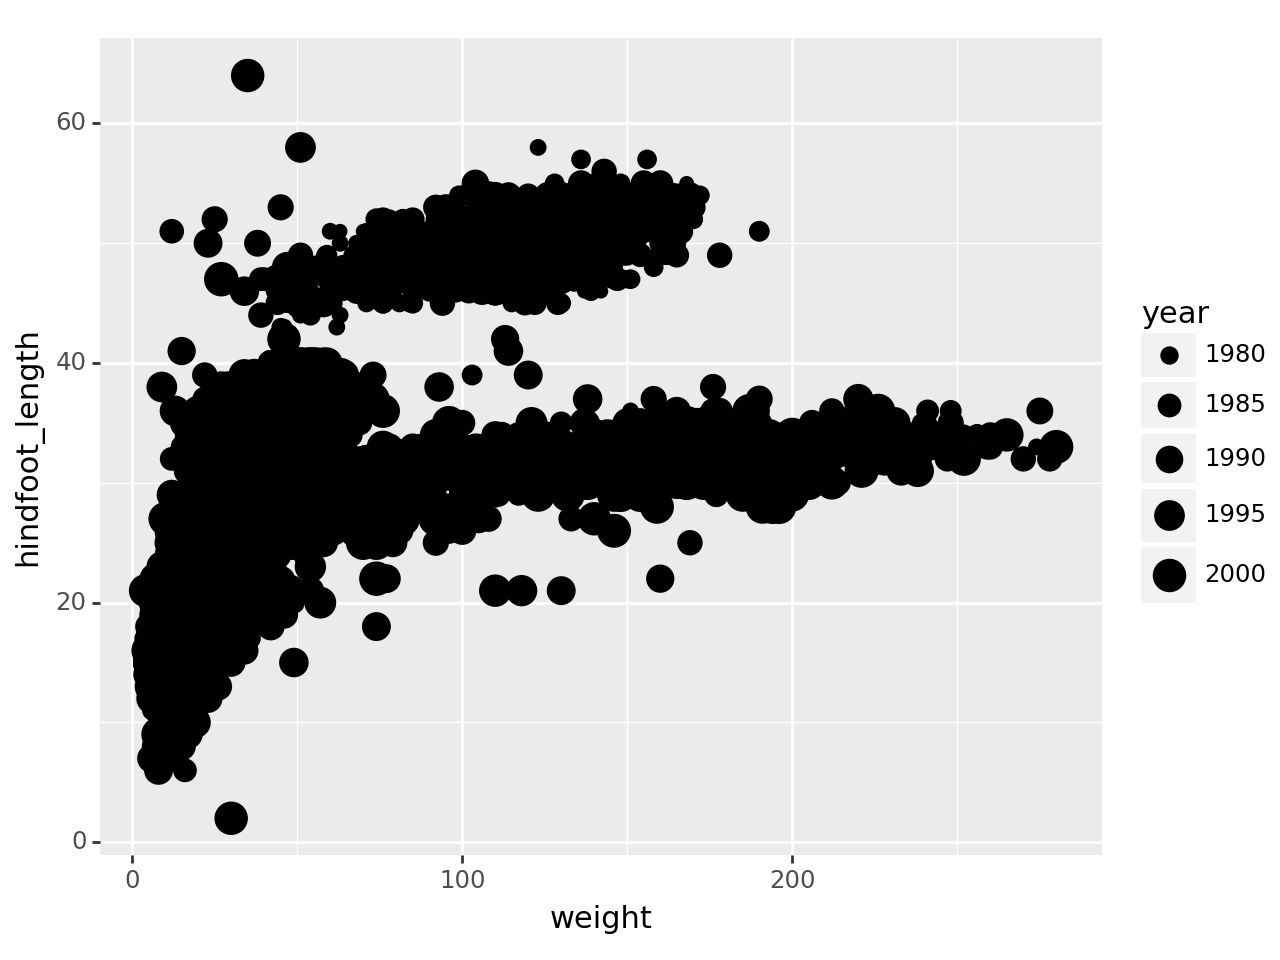

<Figure Size: (640 x 480)>

In [19]:
ggplot(survs_df) + aes(x='weight', y='hindfoot_length',
    size = 'year') + geom_point()

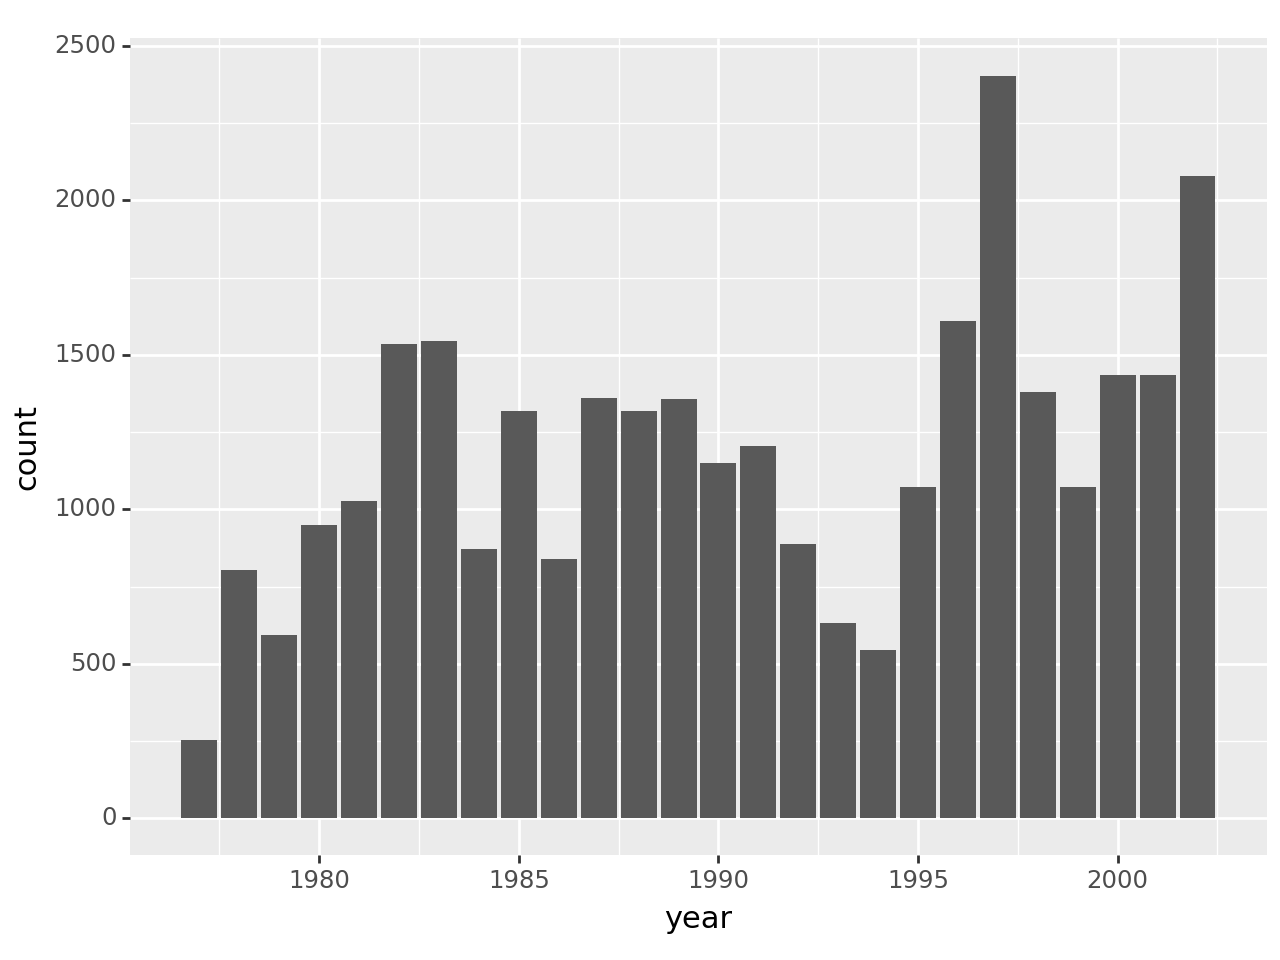

<Figure Size: (640 x 480)>

In [22]:
ggplot(survs_df)+ aes(x='year') + geom_bar(stat = 'count')

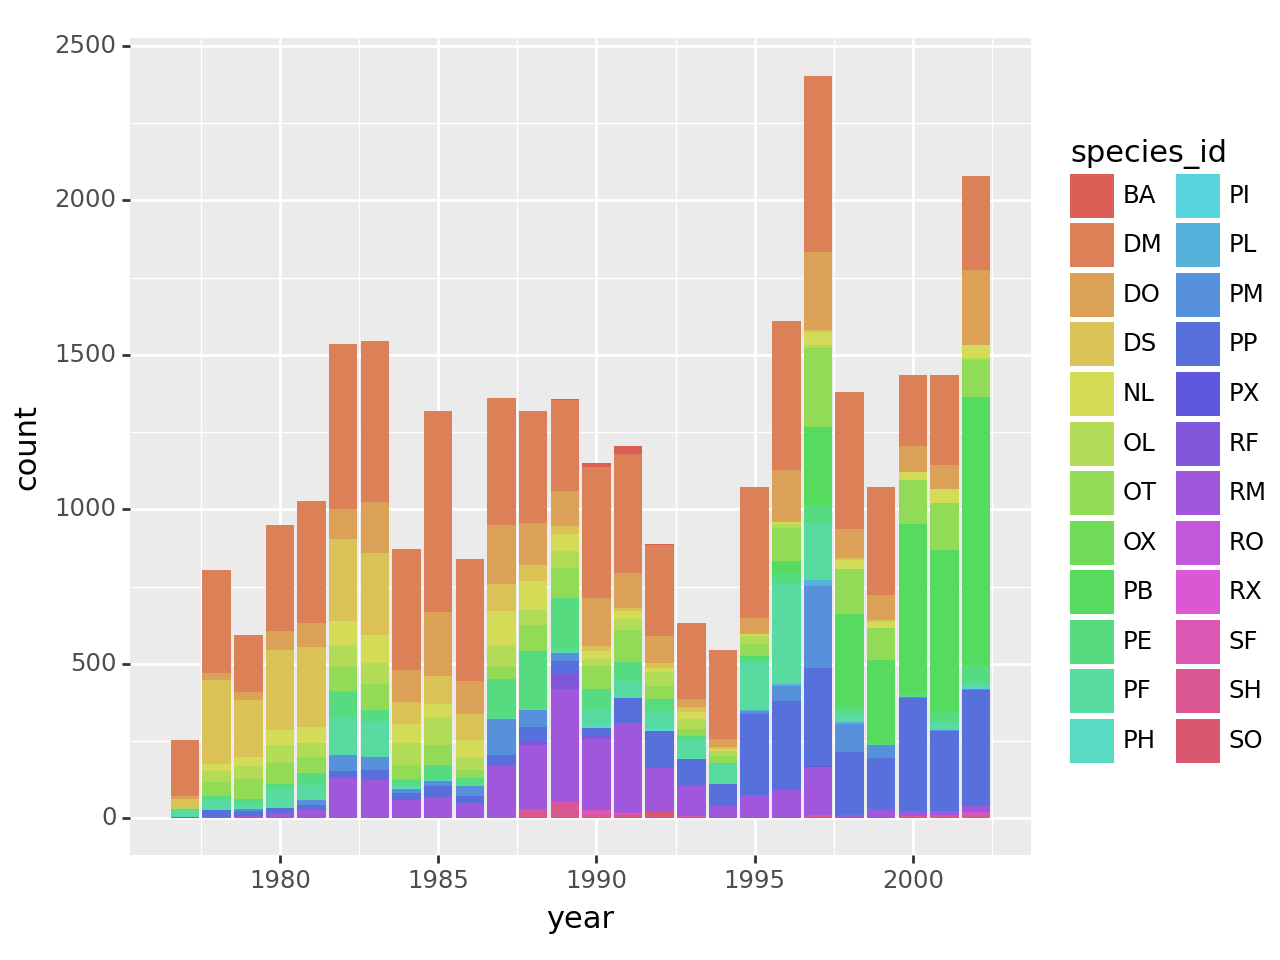

<Figure Size: (640 x 480)>

In [23]:
ggplot(survs_df)+ aes(x='year', fill = 'species_id') + geom_bar(stat = 'count')

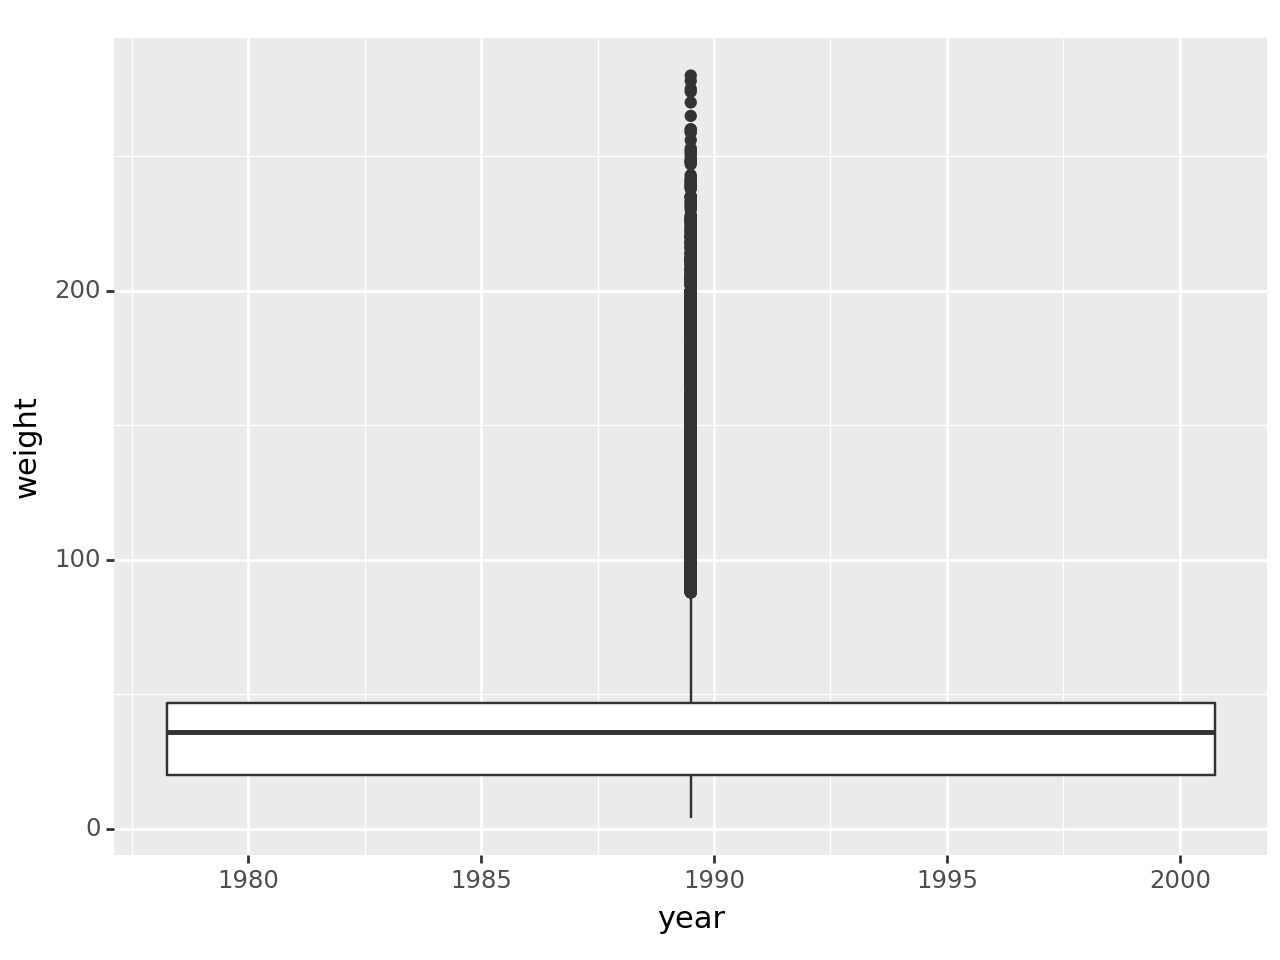

<Figure Size: (640 x 480)>

In [24]:
ggplot(survs_df)+  aes(x='year', y='weight') +geom_boxplot()

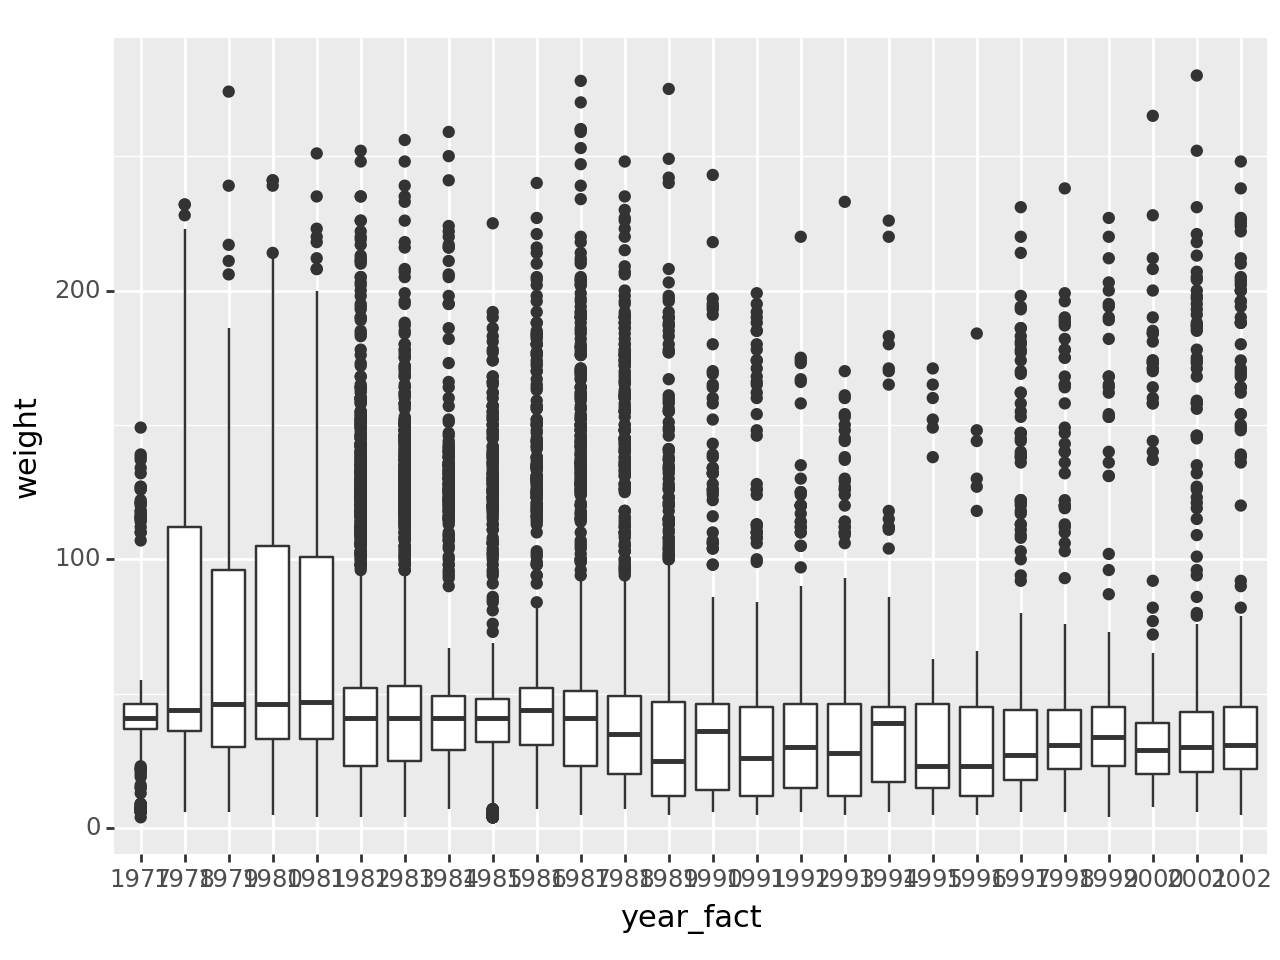

<Figure Size: (640 x 480)>

In [25]:
survs_df['year_fact'] = survs_df['year'].astype("category")

ggplot(survs_df) + aes(x='year_fact', y='weight') + geom_boxplot()

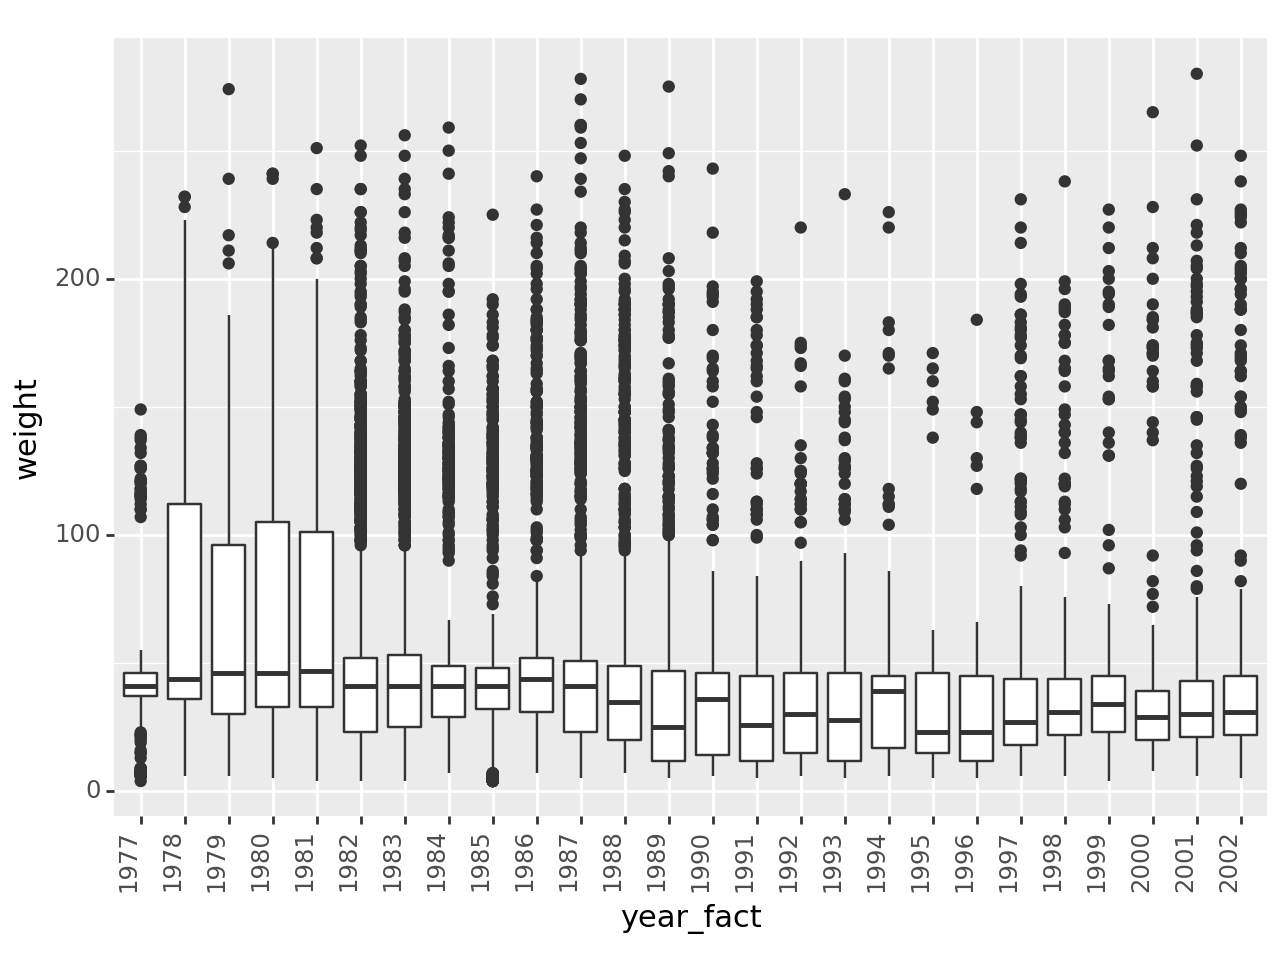

<Figure Size: (640 x 480)>

In [26]:
ggplot(survs_df) + aes(x='year_fact', y='weight') + geom_boxplot() + theme(axis_text_x = element_text(angle=90, hjust=1))

In [27]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1))

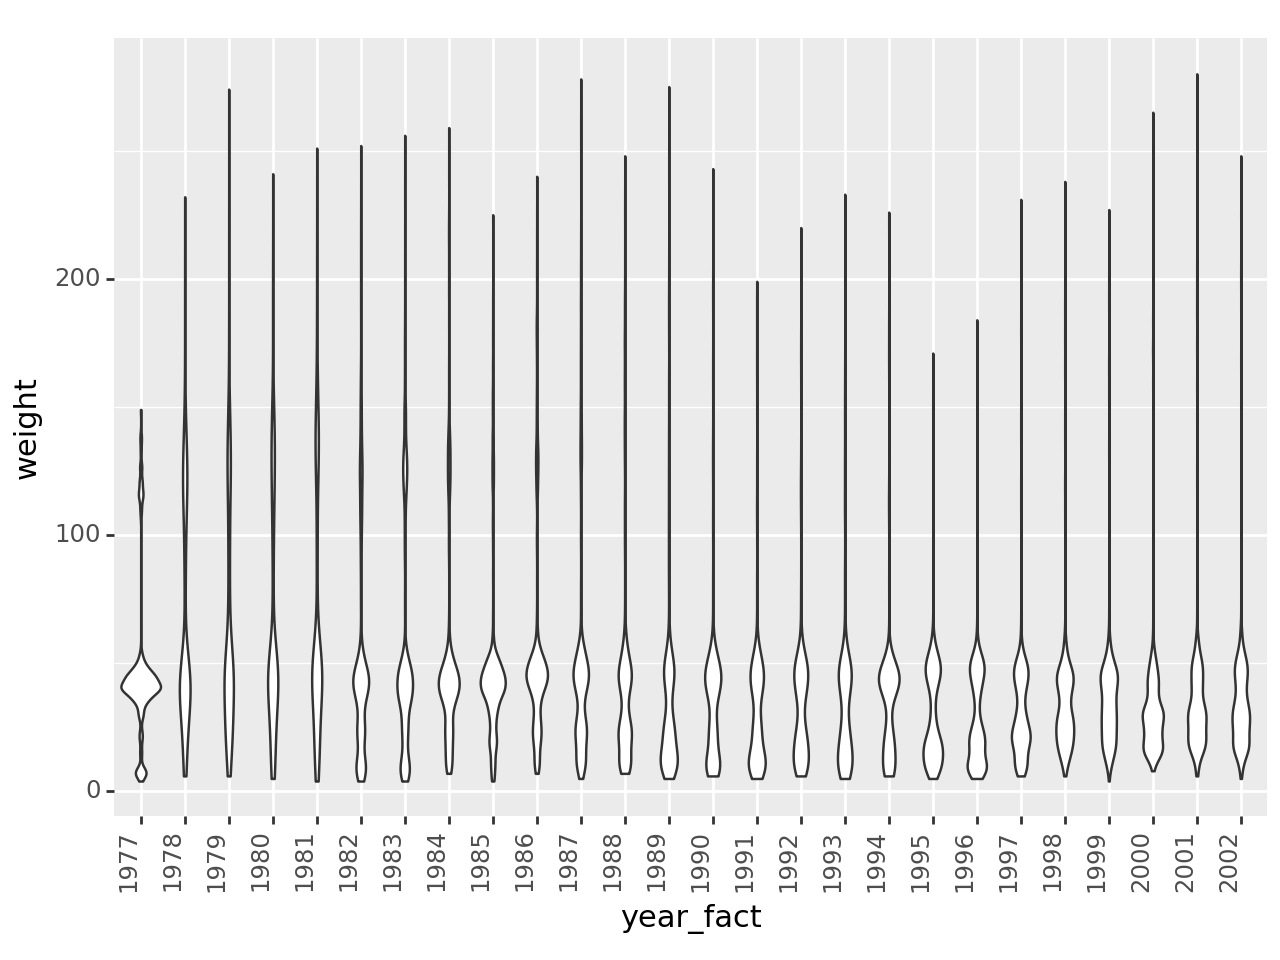

<Figure Size: (640 x 480)>

In [28]:
ggplot(survs_df) + aes(x='year_fact', y='weight') + geom_violin() + flip_xlabels

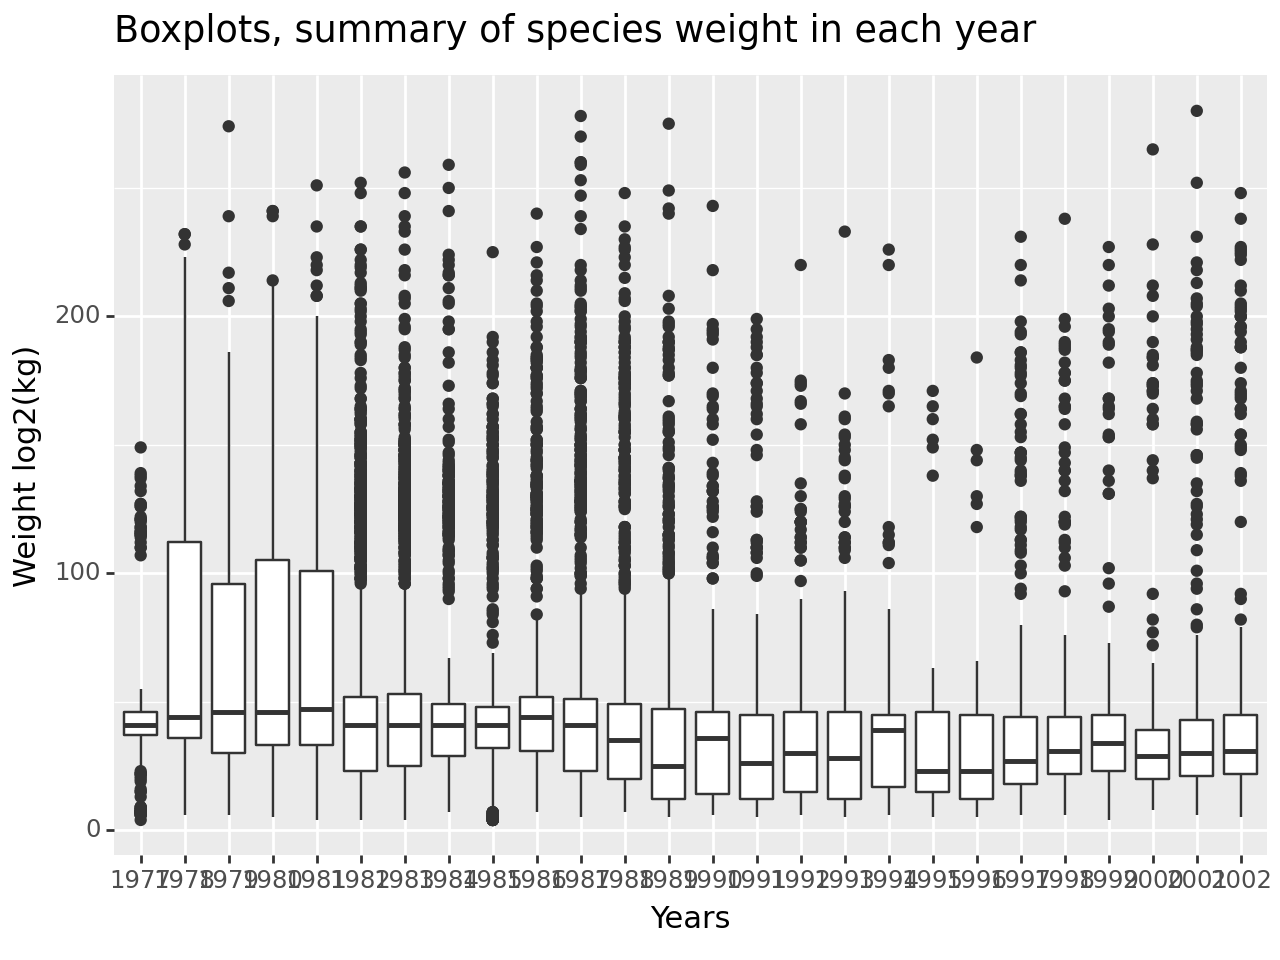

<Figure Size: (640 x 480)>

In [32]:
plt1 = ggplot(survs_df) +  aes(x='year_fact', y='weight') +  geom_boxplot() + xlab("Years") + ylab("Weight log2(kg)") + ggtitle("Boxplots, summary of species weight in each year")
plt1 

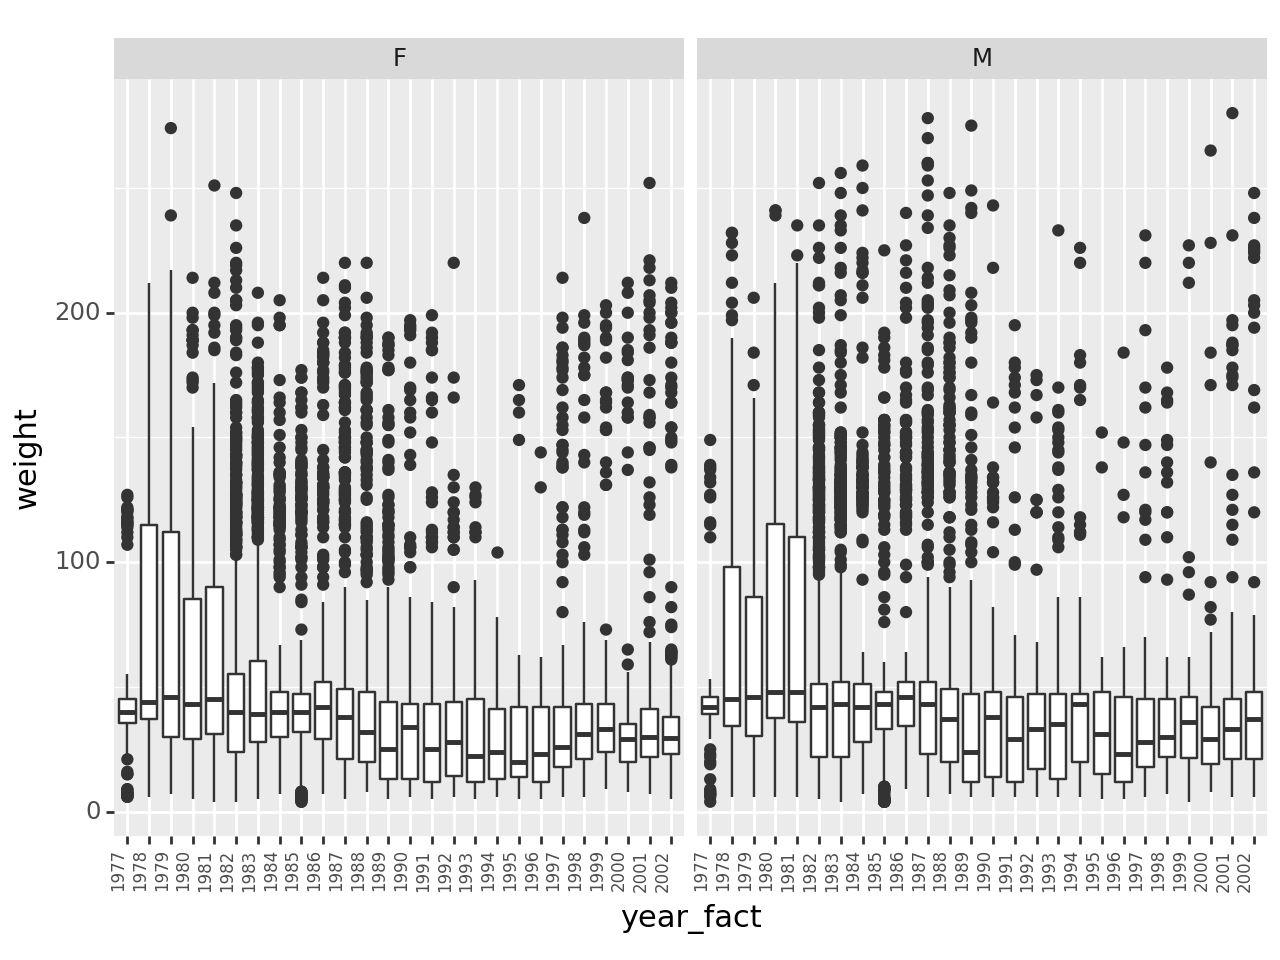

<Figure Size: (640 x 480)>

In [33]:
ggplot(survs_df) + aes(x='year_fact', y='weight') + geom_boxplot() + facet_wrap(['sex']) + flip_xlabels + theme(axis_text_x = element_text(size=6))

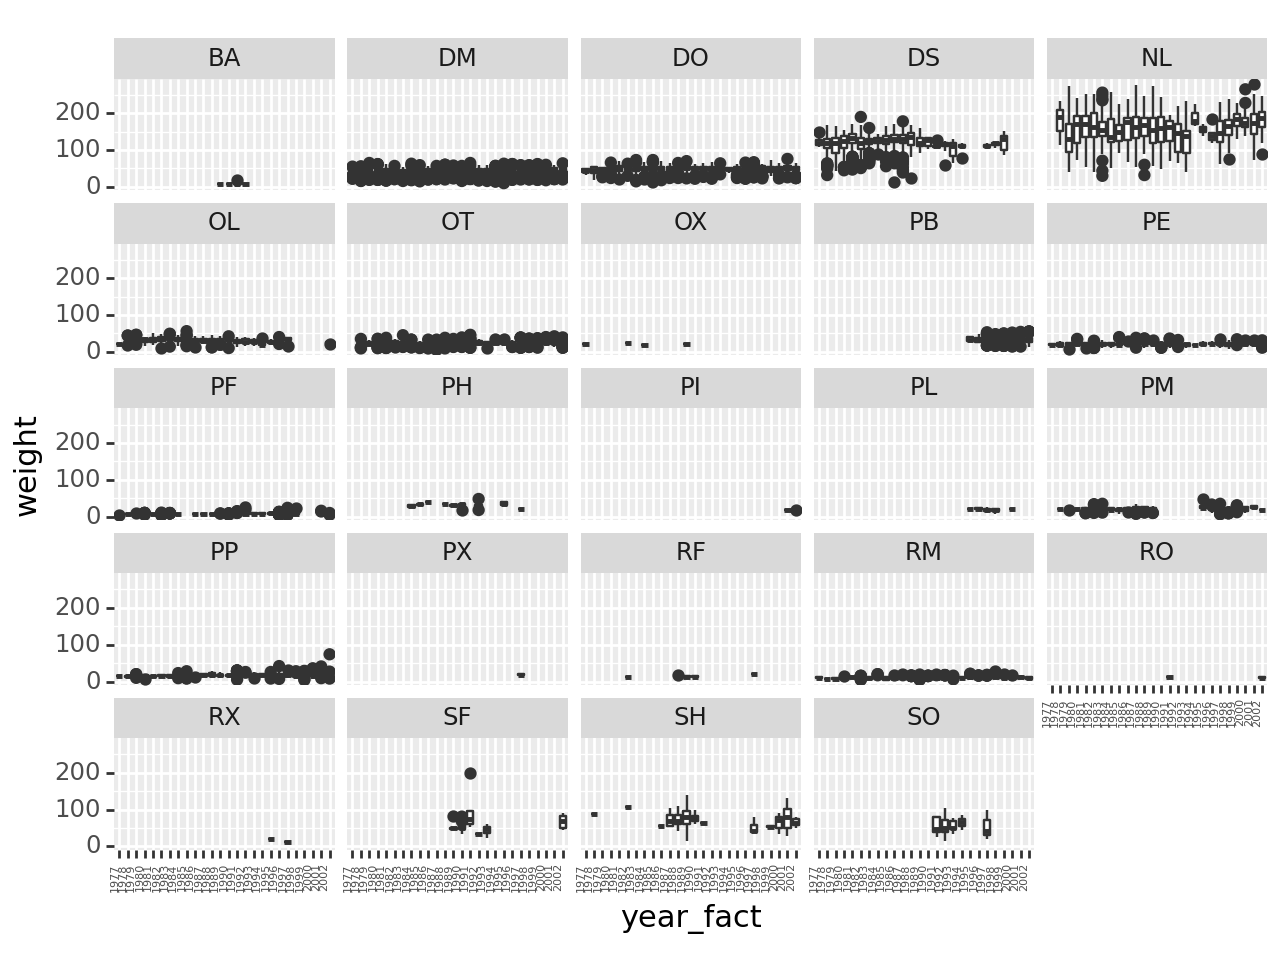

<Figure Size: (640 x 480)>

In [34]:
ggplot(survs_df) + aes(x='year_fact', y='weight') +geom_boxplot() + theme(axis_text_x = element_text(size=4)) + facet_wrap(['species_id']) + flip_xlabels

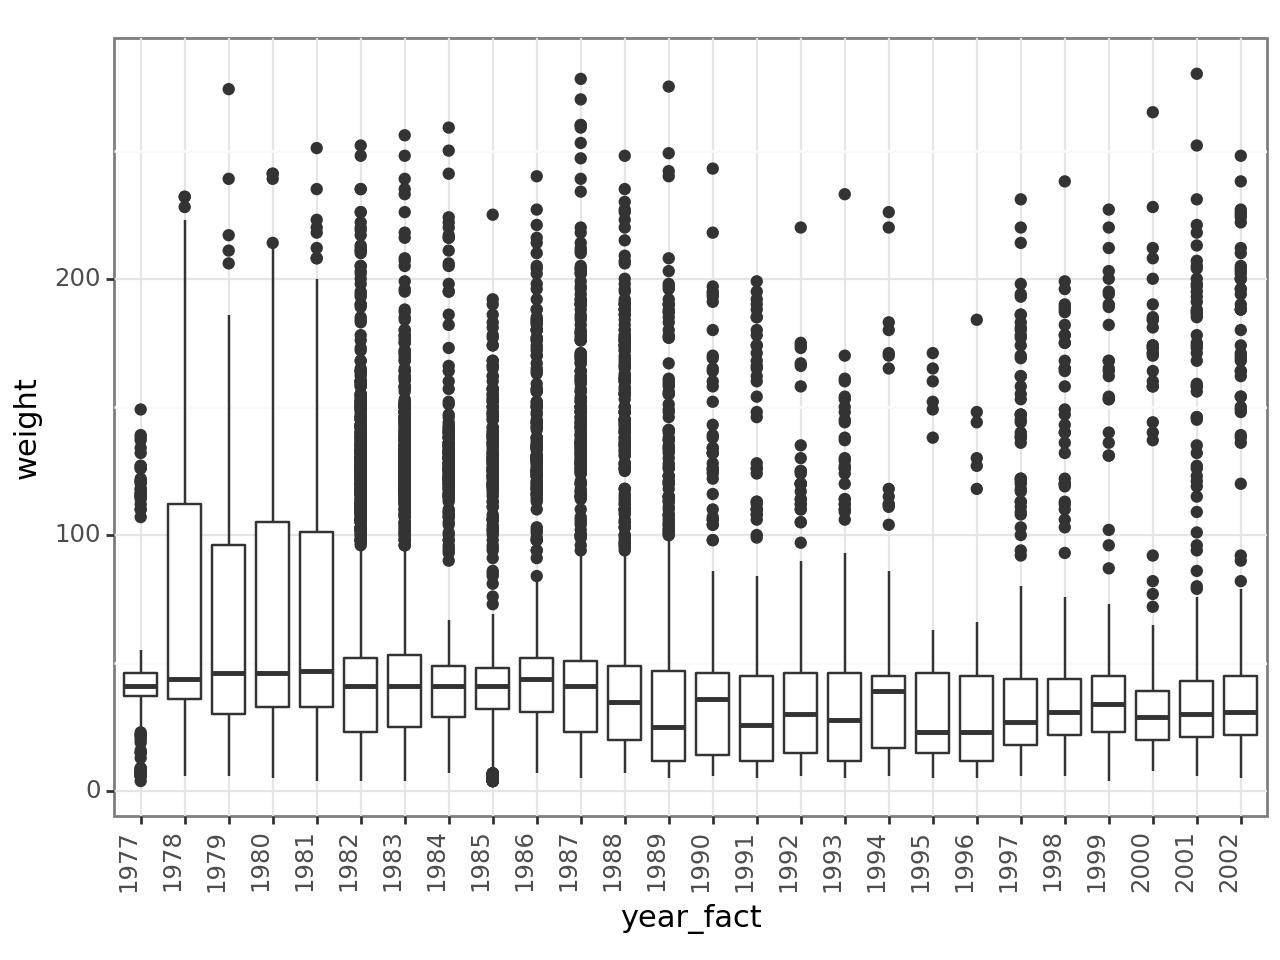

<Figure Size: (640 x 480)>

In [37]:
ggplot(survs_df) + aes(x='year_fact', y='weight') + geom_boxplot() + theme_bw() +flip_xlabels

In [39]:
bins = [(survs_df['year'] < 1980),
        (survs_df['year'] < 1990),
        (survs_df['year'] < 2000),
        (survs_df['year'] >= 2000)]

labels = ['70s', '80s', '90s', 'Z']

survs_df['year_bins'] = np.select(bins, labels)

In [43]:
survs_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type,year_fact,year_bins
11,845,5,6,1978,2,NL,M,32.0,204.0,Neotoma,albigula,Rodent,Control,1978,70s
13,1164,8,5,1978,2,NL,M,34.0,199.0,Neotoma,albigula,Rodent,Control,1978,70s
14,1261,9,4,1978,2,NL,M,32.0,197.0,Neotoma,albigula,Rodent,Control,1978,70s
17,1756,4,29,1979,2,NL,M,33.0,166.0,Neotoma,albigula,Rodent,Control,1979,70s
18,1818,5,30,1979,2,NL,M,32.0,184.0,Neotoma,albigula,Rodent,Control,1979,70s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34779,26557,7,29,1997,7,PL,F,20.0,22.0,Peromyscus,leucopus,Rodent,Rodent Exclosure,1997,90s
34780,26787,9,27,1997,7,PL,F,21.0,16.0,Peromyscus,leucopus,Rodent,Rodent Exclosure,1997,90s
34781,26966,10,25,1997,7,PL,M,20.0,16.0,Peromyscus,leucopus,Rodent,Rodent Exclosure,1997,90s
34782,27185,11,22,1997,7,PL,F,21.0,22.0,Peromyscus,leucopus,Rodent,Rodent Exclosure,1997,90s


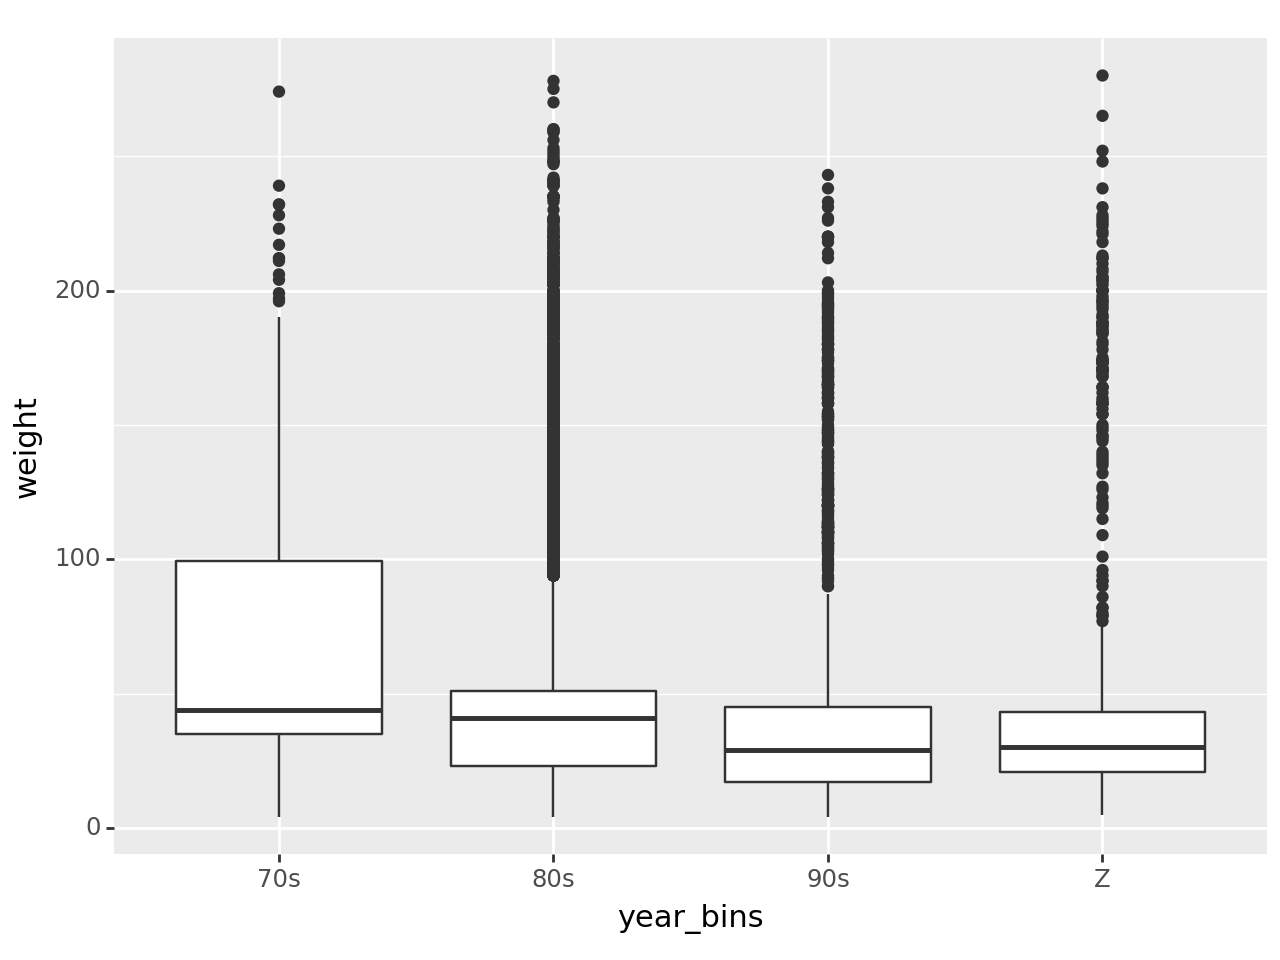

<Figure Size: (640 x 480)>

In [44]:
ggplot(survs_df)+ aes(x='year_bins', y='weight') + geom_boxplot()

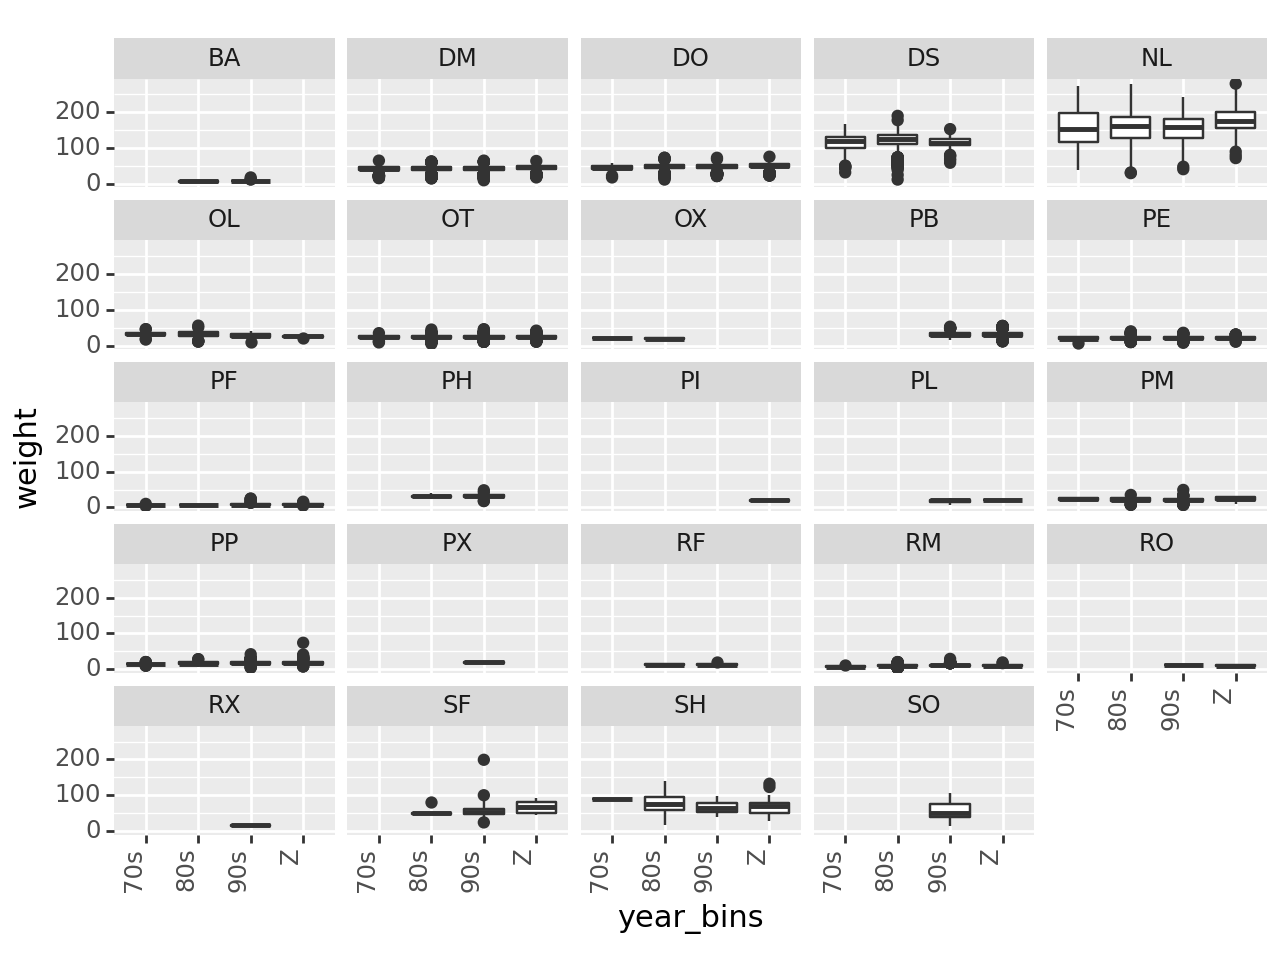

<Figure Size: (640 x 480)>

In [45]:
plt2 = ggplot(survs_df) +  aes(x='year_bins', y='weight') + geom_boxplot() + flip_xlabels +  facet_wrap(['species_id'])
plt2